In [1]:
# basic image classification
# https://www.tensorflow.org/tutorials/keras/classification
from __future__ import absolute_import, division, print_function, unicode_literals

# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libs
import numpy as np
import matplotlib.pyplot  as plt 

print(tf.__version__)

2.0.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 0us/step


In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

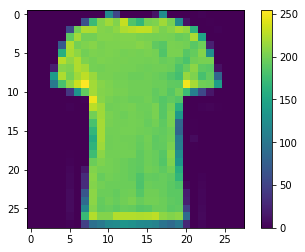

In [11]:
# inspect the data
plt.figure()
plt.imshow(train_images[5999])
plt.colorbar()
plt.grid(False)
plt.show()

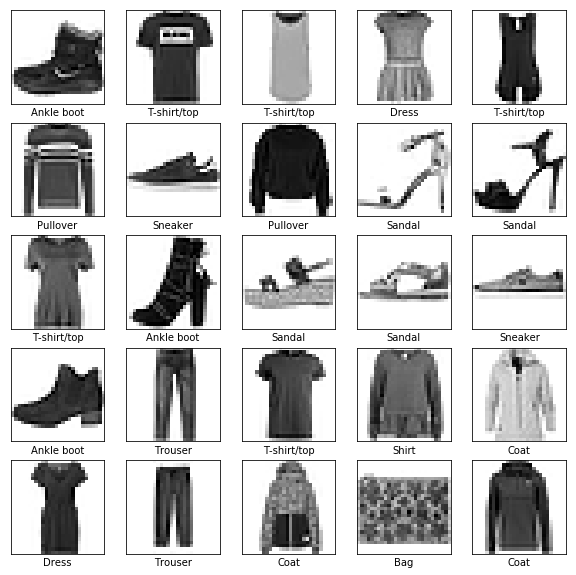

In [37]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [19]:
model.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/sample - loss: 3.0550 - accuracy: 0.7187
Epoch 2/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.6157 - accuracy: 0.7967
Epoch 3/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5274 - accuracy: 0.8220
Epoch 4/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.5246 - accuracy: 0.8231
Epoch 5/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4935 - accuracy: 0.8359
Epoch 6/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4860 - accuracy: 0.8362
Epoch 7/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4875 - accuracy: 0.8322
Epoch 8/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4797 - accuracy: 0.8368
Epoch 9/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4800 - accuracy: 0.8357
Epoch 10/10
60

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


10000/1 - 0s - loss: 0.5750 - accuracy: 0.7863

Test accuracy: 0.7863


In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


10000/1 - 0s - loss: 0.5750 - accuracy: 0.7863

Test accuracy: 0.7863


In [22]:
predictions = model.predict(test_images)


In [23]:
predictions[0]


array([4.0332445e-19, 4.1404166e-13, 0.0000000e+00, 9.1609864e-16,
       0.0000000e+00, 5.4539304e-04, 4.3926841e-26, 3.5849866e-03,
       6.1362231e-14, 9.9586958e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


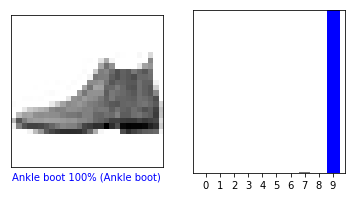

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


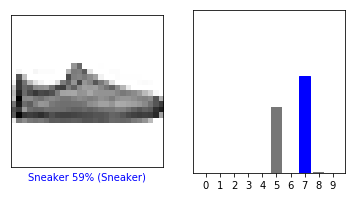

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


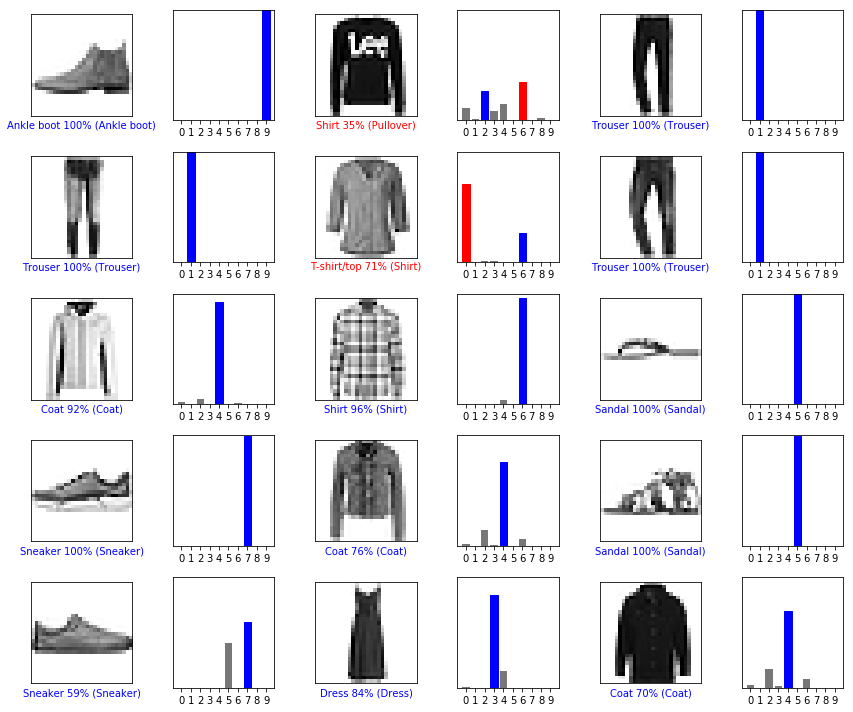

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [29]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


(28, 28)


In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [31]:
predictions_single = model.predict(img)

print(predictions_single)


[[1.1075007e-01 9.6728047e-03 2.6719967e-01 8.5435867e-02 1.5281047e-01
  2.9274204e-04 3.4724137e-01 2.4692139e-07 2.6596231e-02 4.7195547e-07]]


In [32]:
np.argmax(predictions_single[0])


6